In [ ]:
Palavra_A = 0b1110010001000110 #15 genes

Palavra_B = 0b10110110011010000000011111 #25 genes

Palavra_C = 0b11110001010100000110100111000100011000110 #40 genes

In [14]:
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import statistics

136
[p:101011010 cont:9, p:101010010 cont:8, p:101110111 cont:5, p:010001111 cont:3]


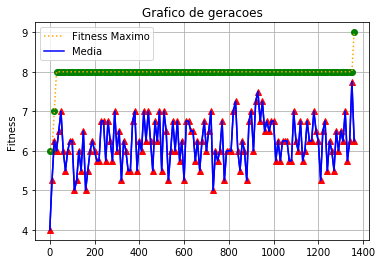

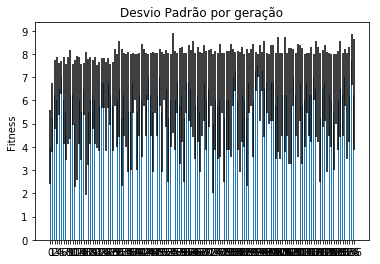

In [21]:
class Binario(object):
    def __init__(self, palavra, contagem):
        self.__palavra = palavra
        self.__contagem = contagem

    def __repr__(self):
        return "p:%s cont:%s" % (self.__palavra, self.__contagem)

    def get_palavra(self):
        return self.__palavra

    def get_contagem(self):
        return self.__contagem

class Palavra_Binaria(object):

    __listaPalavras__ = []
    __listaMaxFitness__ = []
    __listaMediaFitness__ = []
    __listaDesvioPadraoFitness__ = []

    def __init__(self, objetivo, iteracoes, nPalavras):
        self.__obj__ = objetivo
        self.__it__ = iteracoes
        self.__n__ = nPalavras

    def bit(self):
        random.seed(a=None, version=2)
        binario = random.randrange(2)
        return str(binario)

    def palavra(self):
        tamanho = str.__len__(self.__obj__)
        palavra = ''
        for i in self.__obj__:
            palavra += self.bit()
        return palavra

    def contagem(self, palavra):
        contador = 0
        for j in range(len(palavra)):
            if palavra[j] == self.__obj__[j]:
                contador += 1
        return contador

    def criar_binarios_inicial(self):
        for i in range(self.__n__):
            palavra = self.palavra()
            contador = self.contagem(palavra)
            self.__class__.__listaPalavras__.append(Binario(palavra, contador))

    def criar_binarios_metade(self):
        for i in range(int(self.__n__/2)):
            palavra = self.palavra()
            contador = self.contagem(palavra)
            self.__class__.__listaPalavras__.append(Binario(palavra, contador))

    def ordenar(self):
        lista_binarios_ordenados = sorted(self.__class__.__listaPalavras__, key = Binario.get_contagem, reverse=True)
        self.__class__.__listaPalavras__ = lista_binarios_ordenados
        self.__class__.__listaMaxFitness__.append(lista_binarios_ordenados[0].get_contagem())

    def remover_metade(self):
        self.__class__.__listaPalavras__[int(len(self.__class__.__listaPalavras__)/2) : len(self.__class__.__listaPalavras__)] = []

    def executa(self):
        p.criar_binarios_inicial()
        for i in range(self.__it__):

            p.ordenar()
            p.remover_metade()
            p.criar_binarios_metade()

            media = statistics.mean(x.get_contagem() for x in self.__class__.__listaPalavras__)
            desviopadrao = statistics.pstdev(x.get_contagem() for x in self.__class__.__listaPalavras__)

            self.__class__.__listaMediaFitness__.append(media)
            self.__class__.__listaDesvioPadraoFitness__.append(desviopadrao)

            if (self.__class__.__listaPalavras__[0].get_palavra() == self.__obj__):
                print(i)
                break


    @classmethod
    def all(cls):
        return cls.__listaPalavras__

if __name__ == '__main__':
    p = Palavra_Binaria("101011010", 1000, 5)
    p.executa()
    print(Palavra_Binaria.all())
    x = 10 * np.array(range(len(p.__listaMaxFitness__)))
    plt.plot(x, p.__listaMaxFitness__, 'go')
    plt.plot(x, p.__listaMaxFitness__, 'k:', color='orange', label="Fitness Maximo")
    plt.plot(x, p.__listaMediaFitness__, 'r^')
    plt.plot(x, p.__listaMediaFitness__, color='blue',label="Media")
    plt.plot(x, p.__listaMediaFitness__, 'b-')
    plt.legend(loc='upper left')
    plt.ylabel('Fitness')
    plt.title("Grafico de geracoes")
    plt.grid(True)
    plt.show()

    menMeans = p.__listaMediaFitness__
    menStd = p.__listaDesvioPadraoFitness__
    ind = np.arange(len(p.__listaDesvioPadraoFitness__))  # the x locations for the groups
    width = 0.35 # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    plt.ylabel('Fitness')
    plt.title('Desvio Padrão por geração')
    plt.xticks(ind)
    plt.yticks(np.arange(0, 10, 1))
    plt.show()